In [4]:
goodsubjects=[4,7,11,14,16,23,24,25]

with open('pilots_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
sub_list = [line.strip() for line in sub_list]

good_subjects_list=[]
for gs in goodsubjects:
    good_subjects_list.append(sub_list[gs])

with open('good_pilots_ru_dm_list.txt', 'w') as f:
    for item in good_subjects_list:
        # write each string to the file with a newline character at the end
        f.write("%s\n" % item)

## load good subjects

In [11]:
with open('good_pilots_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
good_subjects_list = [line.strip() for line in sub_list]

good_subjects_list

['NDARHJ830RXD',
 'NDARVB897AH1',
 'NDARFA402LMW',
 'NDARUX340FYC',
 'NDARJG687YYX',
 'NDARVD194JX2',
 'NDARVR601FUT',
 'NDARUL694GYN']

In [ ]:
# figure out all runs to run and run them

In [ ]:
# delay7:
# auditory roi
# good subjects

# cochresnet50 (mean) X

# cochresnet50PCA1-200 X

# cochresnet50PCAc2 X


# cochresnet50PCAlocal1,10 X

# cochresnet50fullPCA1-200 X

# cochresnet50PCAlocalrev1,5 X

# cochresnet50TxT X

# manual (resampled) X
# manualmean //hrf? X

# manualLowLevel X
# manualAudioSet X

# manualPCA1 X
# manualPCA10 X

In [24]:
def load_audio_features_PCA_new_full_rev(stim,all_layers,n_components):
    #this method does not take the mean across time so it is large!
    from sklearn.decomposition import PCA
    transformer = PCA(n_components=n_components)
    #dimensionality reduction to 50 components
    #transformer = SparseRandomProjection(n_components=50)
    save_features_dir = f'../data/{stim}_clips_cochresnet50/'

    #get the time dimension of each layer
    all_layers_time_shape=[]
    file = h5py.File(f'{save_features_dir}cochresnet50_activations.h5', 'r')
    for layer in all_layers:
        all_layers_time_shape.append(file[layer].shape[1])
    
    X=[]
    file = h5py.File(f'{save_features_dir}cochresnet50_activations_full.h5', 'r')
    for l,layer in enumerate(all_layers):
        print(l,layer)
        data = file[layer]
        data=np.asanyarray(data)
        data=np.reshape(data, (data.shape[0],all_layers_time_shape[l],-1))
        print('input=',data.shape)
        X_pca=[]
        for x_i in np.arange(data.shape[0]):
            #X_pca.append(np.mean ( transformer.fit_transform(data[x_i,:,:].T).T  ,axis=1) )
            #xx=np.mean( transformer.fit_transform(data[x_i,:,:].T).T  ,axis=1)
            X_pca.append(transformer.fit_transform(data[x_i,:,:]))

        X_pca=np.asanyarray(X_pca)
        print('after mean()=',X_pca.shape)
        X_pca=np.reshape(X_pca, (X_pca.shape[0],-1))
        #X.append(  X_pca[:(-1*delay),:]   )
        X.append(  X_pca   )
        print('after flatten=',X_pca.shape)

    file.close()
    return(X)

In [4]:
def load_audio_features_TxT(stim,all_layers):
    #this method does not take the mean across time so it is large!
    #dimensionality reduction to 50 components
    #transformer = SparseRandomProjection(n_components=50)
    save_features_dir = f'../data/{stim}_clips_cochresnet50/'
    #get the time dimension of each layer
    all_layers_time_shape=[]
    file = h5py.File(f'{save_features_dir}cochresnet50_activations.h5', 'r')
    for layer in all_layers:
        all_layers_time_shape.append(file[layer].shape[1])
    
    X=[]
    file = h5py.File(f'{save_features_dir}cochresnet50_activations_full.h5', 'r')
    for l,layer in enumerate(all_layers):
        print(l,layer)
        data = file[layer]
        data=np.asanyarray(data)
        # data=np.reshape(data, (data.shape[0],all_layers_time_shape[l],-1))
        print('input=',data.shape)
        #print(np.corrcoef(data).shape)

        X.append(np.corrcoef(data))
        # print('after flatten=',_.shape)

    file.close()
    return(X)

## set up cochresnet50PCAc2

In [2]:
#cochresnet50PCAc2
import nat_asd_utils
from sklearn.decomposition import PCA
import numpy as np
import h5py



features=['input_after_preproc',
                    'conv1_relu1',
                    'maxpool1',
                    'layer1',
                    'layer2',
                    'layer3',
                    'layer4',
                    'avgpool']
# X=nat_asd_utils.load_audio_features('DM',features)
# X,features=pilot.load_features('cochresnet50pcac2')

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [5]:
features=['input_after_preproc',
                    'conv1_relu1',
                    'maxpool1',
                    'layer1',
                    'layer2',
                    'layer3',
                    'layer4',
                    'avgpool']
X=load_audio_features_TxT('DM',features)

with h5py.File(f'../data/features/DM_cochresnet50_activations-full_TxT.hdf5', 'w') as f:
        for i, layer in enumerate(features):
            f.create_dataset(layer, data=X[i])

0 input_after_preproc
input= (749, 82290)
1 conv1_relu1
input= (749, 1322880)
2 maxpool1
input= (749, 332416)
3 layer1
input= (749, 1329664)
4 layer2
input= (749, 677376)
5 layer3
input= (749, 358400)
6 layer4
input= (749, 186368)
7 avgpool
input= (749, 2048)


In [1]:
features=['input_after_preproc',
 'conv1_relu1',
 'maxpool1',
 'layer1',
 'layer2',
 'layer3',
 'layer4']

for n_components in [1,5]:
    print(n_components)
    X=load_audio_features_PCA_new_full_rev('DM',features,n_components)
    with h5py.File(f'../data/features/DM_cochresnet50_activations-full_PCA-local-{n_components}_rev.hdf5', 'w') as f:
        for i, layer in enumerate(all_layers):
            f.create_dataset(layer, data=X[i])

1


NameError: name 'load_audio_features_PCA_new_full_rev' is not defined

In [1]:
# set up HRF, prove it is good
import hrf_tools
from scipy.signal import resample
import matplotlib.pyplot as plt
import numpy as np
import nat_asd_utils

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [2]:
stim='DM'
features=['rms','chroma', 'mfcc', 'mfs', 'as_embed', 'as_scores']
X=nat_asd_utils.load_audio_features_manual_hrf(stim,features)


In [2]:
import pilot
X,features=pilot.load_features('manualhrfpca10')
for x in X:
    print(x.shape)

(750, 10)
(750, 10)
(750, 10)
(750, 10)
(750, 10)


In [8]:
from sklearn.decomposition import PCA
X_pca=[]
transformer = PCA(n_components=1)
for x in X:
    X_pca.append(   transformer.fit_transform(x)   ) 
X=X_pca

In [17]:
X=X_pca

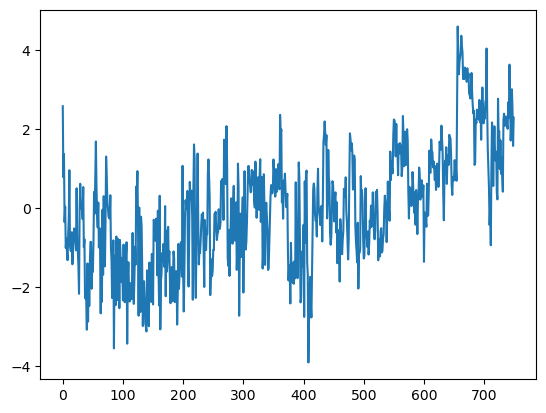

In [23]:
import matplotlib.pyplot as plt
plt.plot(X[2])

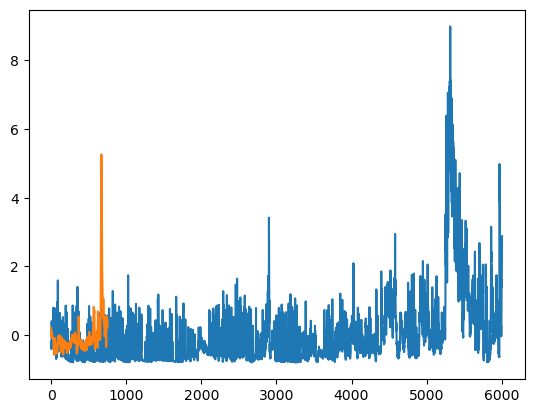

In [58]:
featplot=0
plt.plot(feature_raw[:,featplot])
plt.plot(feature[:,featplot])

In [1]:
import pilot
import nat_asd_utils
f="cochresnet50PCAlocal1"
X,features=pilot.load_features(f)

# feature_filename='DM_cochresnet50_activations-full_PCA-local-1.hdf5'
# features_cochresnet_short=['input_after_preproc',
#                     'conv1_relu1',
#                     'maxpool1',
#                     'layer1',
#                     'layer2',
#                     'layer3',
#                     'layer4']
# X=nat_asd_utils.load_audio_features_processed(feature_filename,features_cochresnet_short)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


## run the script within jupyter

In [4]:
%run pilot.py -s NDARHJ830RXD -p auditory -f manual -d 7

running subject NDARHJ830RXD
loaded parcels ['A1', 'LBelt', 'MBelt', 'PBelt', 'A4', 'TA2', 'A5']
loaded brain data
No value was passed to args.bootstrap
starting regression
42.332775592803955
saving results


## see how big all of the features are to see how to set up jobs

In [1]:
short_feats=["manual",'manuallow','audioset','manualhrf','manualhrfpca1','manualhrfpca10',
             "cochresnet50pca1","cochresnet50pca200","cochresnet50pca5",
             "cochresnet50pca10","cochresnet50pca50","cochresnet50pca100",
             "cochresnet50pcafull1","cochresnet50pcafull200","cochresnet50pcafull5",
             "cochresnet50pcafull10","cochresnet50pcafull50","cochresnet50pcafull100",
             "cochresnet50pcac2","cochresnet50PCAlocal1",
             "cochresnet50PCAlocal1mean","cochresnet50PCAlocal10mean"]

long_feats=["cochresnet50","cochresnet50PCAlocal10","cochresnet50PCAlocal1rev","cochresnet50PCAlocal5rev"]



import pilot
    
for f in short_feats:
    print(f)
    X,features=pilot.load_features(f)
    for x in X:
        print(x.shape)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


manual
(750, 1)
(750, 12)
(750, 13)
(750, 128)
(750, 1024)
(750, 521)
manuallow
(750, 1)
(750, 12)
(750, 13)
(750, 128)
audioset
(750, 1024)
(750, 521)
manualhrf
(750, 1)
(750, 12)
(750, 13)
(750, 128)
(750, 1024)
(750, 521)
manualhrfpca1
(750, 1)
(750, 1)
(750, 1)
(750, 1)
(750, 1)
(750, 1)
manualhrfpca10
(750, 10)
(750, 10)
(750, 10)
(750, 10)
(750, 10)
cochresnet50
(749, 211)
(749, 6784)
(749, 3392)
(749, 13568)
(749, 13824)
(749, 14336)
(749, 14336)
(749, 2048)
cochresnet50pca1
(749, 1)
(749, 1)
(749, 1)
(749, 1)
(749, 1)
(749, 1)
(749, 1)
(749, 1)
cochresnet50pca200
(749, 200)
(749, 200)
(749, 200)
(749, 200)
(749, 200)
(749, 200)
(749, 200)
(749, 200)
cochresnet50pca5
(749, 5)
(749, 5)
(749, 5)
(749, 5)
(749, 5)
(749, 5)
(749, 5)
(749, 5)
cochresnet50pca10
(749, 10)
(749, 10)
(749, 10)
(749, 10)
(749, 10)
(749, 10)
(749, 10)
(749, 10)
cochresnet50pca50
(749, 50)
(749, 50)
(749, 50)
(749, 50)
(749, 50)
(749, 50)
(749, 50)
(749, 50)
cochresnet50pca100
(749, 100)
(749, 100)
(749, 10

In [2]:


["cochresnet50","cochresnet50PCAlocal1rev","cochresnet50PCAlocal5rev"]


vis_feats=["manual",'manuallow','audioset',
             "cochresnet50pca1","cochresnet50pca200","cochresnet50pca5",
             "cochresnet50pca10","cochresnet50pca50","cochresnet50pca100",
             "cochresnet50pcafull1","cochresnet50pcafull200","cochresnet50pcafull5",
             "cochresnet50pcafull10","cochresnet50pcafull50","cochresnet50pcafull100",
             "cochresnet50pcac2","cochresnet50PCAlocal1",
             "cochresnet50PCAlocal1mean","cochresnet50PCAlocal10mean","cochresnet50PCAlocal10"]
hrf_feats=['manualhrf','manualhrfpca1','manualhrfpca10',"cochresnet50pca1hrf",'cochresnet50pca1hrfssfirst','cochresnet50pca20hrfssfirst','both_hrf']
hrf_feats_z=['cochresnet50pca1hrfssfirst','cochresnet50pca20hrfssfirst']

good_subjects_list

['NDARHJ830RXD',
 'NDARVB897AH1',
 'NDARFA402LMW',
 'NDARUX340FYC',
 'NDARJG687YYX',
 'NDARVD194JX2',
 'NDARVR601FUT',
 'NDARUL694GYN']

## summary plots of all model results!

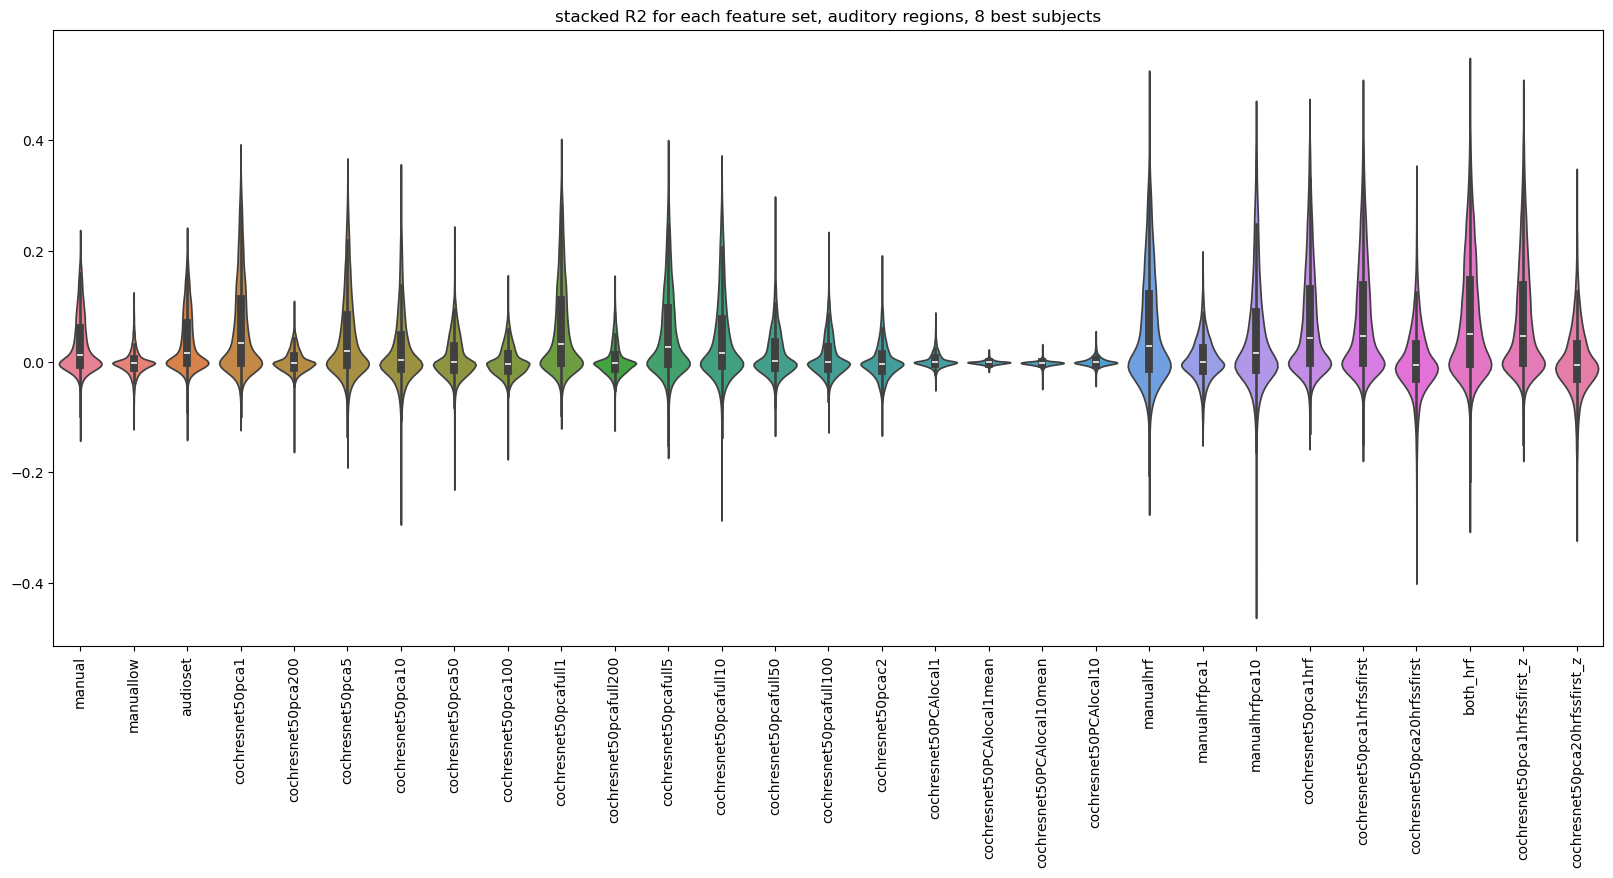

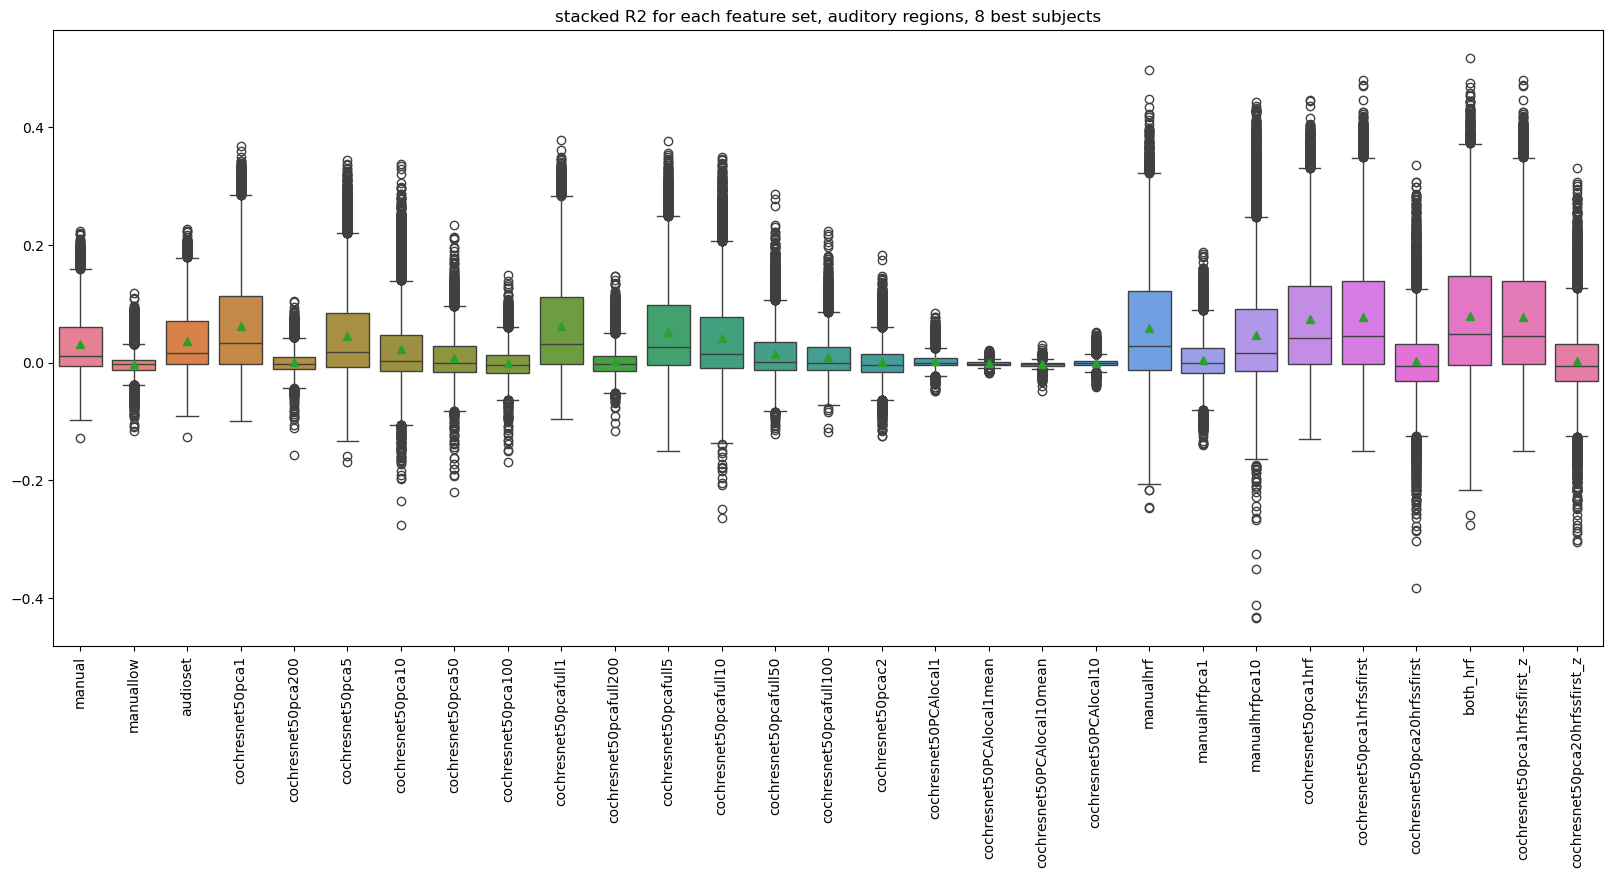

In [4]:
import numpy as np

plot_data=[]
plot_data_labels=[]
for v in vis_feats:
    feat_data=[]
    for s in good_subjects_list:
        dataload=np.load(f'../good_pilots/sub-{s}_roi-auditory_feat-{v}_delay-7.npz')
        feat_data.append(dataload['stacked_r2s'])
    plot_data.append(  np.asanyarray(feat_data).flatten()  )
    plot_data_labels.append(v)
for v in hrf_feats:
    feat_data=[]
    for s in good_subjects_list:
        dataload=np.load(f'../good_pilots/sub-{s}_roi-auditory_feat-{v}_delay-0.npz')
        feat_data.append(dataload['stacked_r2s'])
    plot_data.append(  np.asanyarray(feat_data).flatten()  )
    plot_data_labels.append(v)
for v in hrf_feats_z:
    feat_data=[]
    for s in good_subjects_list:
        dataload=np.load(f'../good_pilots/sub-{s}_roi-auditory_feat-{v}_delay-0_z.npz')
        feat_data.append(dataload['stacked_r2s'])
    plot_data.append(  np.asanyarray(feat_data).flatten()  )
    plot_data_labels.append(v+'_z')


#plot_data=np.concatenate((r2s, stacked_r2s.reshape(1, -1)), axis=0).T
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(20,8))
ax=sns.violinplot(data=plot_data)
plt.title(f'stacked R2 for each feature set, auditory regions, 8 best subjects')

# Add 'stacked' to the end of your features list
labels = plot_data_labels

# Set the xticklabels of your plot
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels,rotation=90)
plt.show()


plt.figure(figsize=(20,8))
ax=sns.boxplot(data=plot_data,showmeans=True)
plt.title(f'stacked R2 for each feature set, auditory regions, 8 best subjects')

# Add 'stacked' to the end of your features list
labels = plot_data_labels

# Set the xticklabels of your plot
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels,rotation=90)
plt.show()


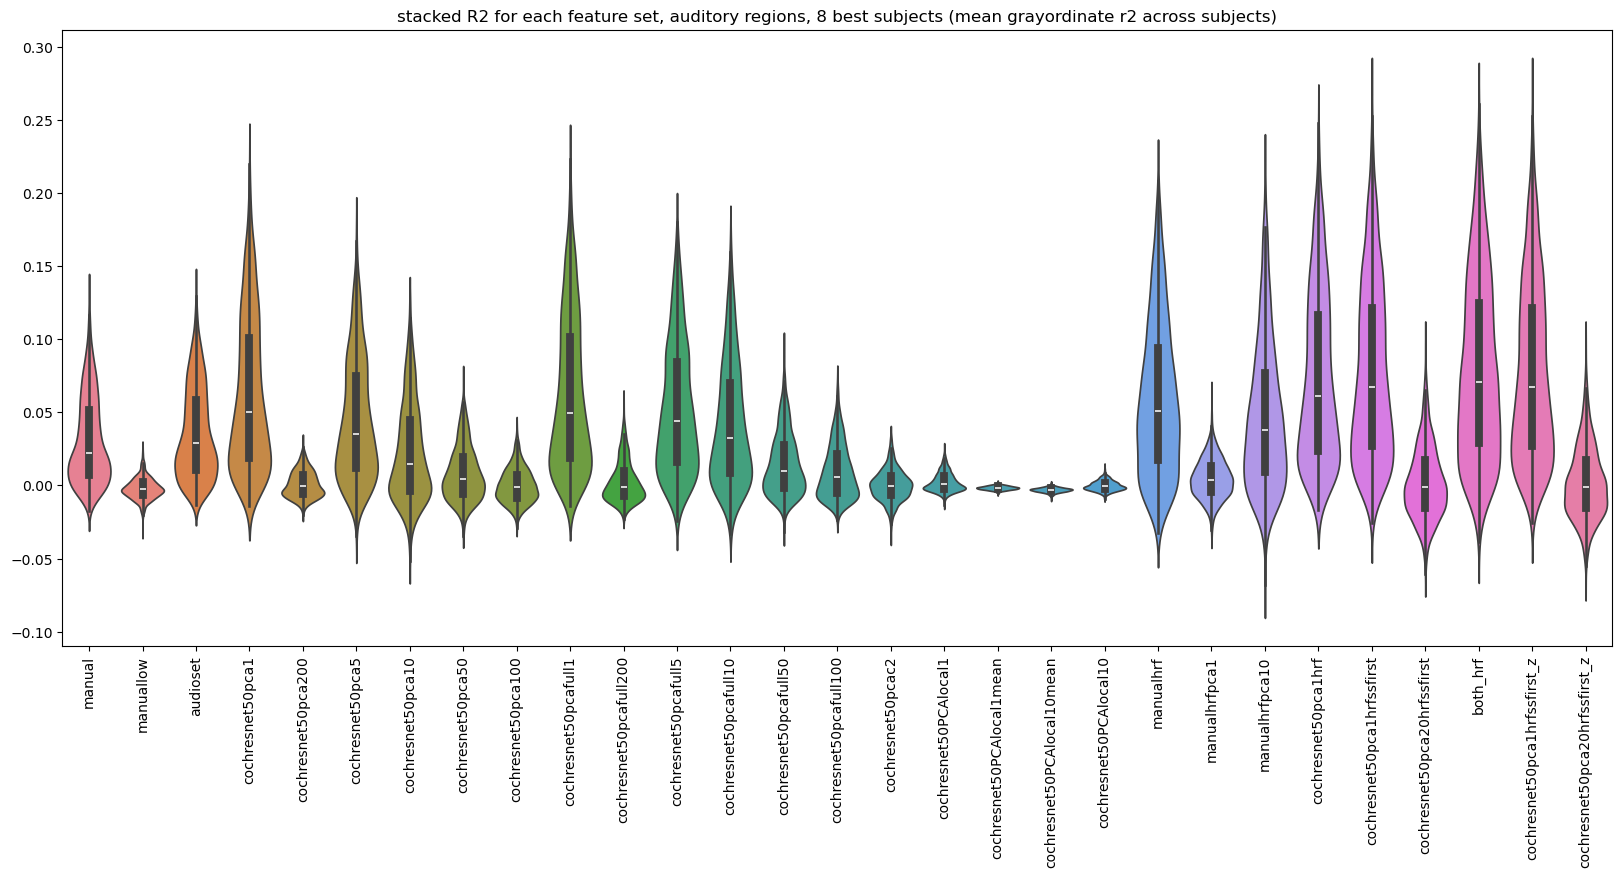

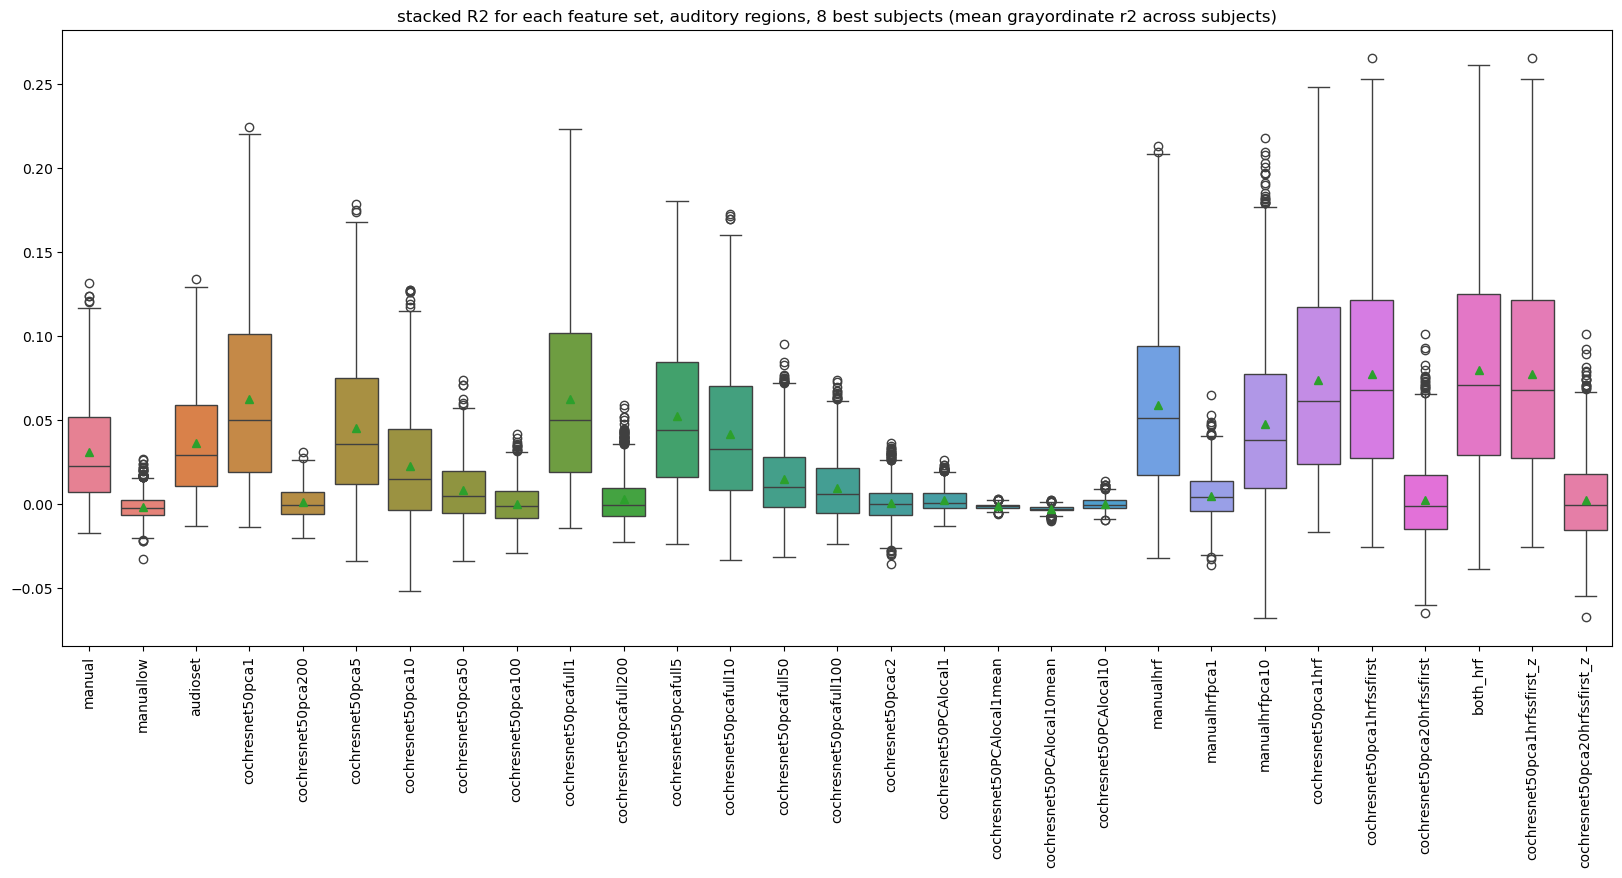

In [5]:
#same plot but the mean per grayprdinate across subjects

import numpy as np

plot_data=[]
plot_data_labels=[]
for v in vis_feats:
    feat_data=[]
    for s in good_subjects_list:
        dataload=np.load(f'../good_pilots/sub-{s}_roi-auditory_feat-{v}_delay-7.npz')
        feat_data.append(dataload['stacked_r2s'])
    plot_data.append(  np.mean(np.asanyarray(feat_data),axis=0) )
    plot_data_labels.append(v)
for v in hrf_feats:
    feat_data=[]
    for s in good_subjects_list:
        dataload=np.load(f'../good_pilots/sub-{s}_roi-auditory_feat-{v}_delay-0.npz')
        feat_data.append(dataload['stacked_r2s'])
    plot_data.append(  np.mean(np.asanyarray(feat_data),axis=0)  )
    plot_data_labels.append(v)
for v in hrf_feats_z:
    feat_data=[]
    for s in good_subjects_list:
        dataload=np.load(f'../good_pilots/sub-{s}_roi-auditory_feat-{v}_delay-0_z.npz')
        feat_data.append(dataload['stacked_r2s'])
    plot_data.append(  np.mean(np.asanyarray(feat_data),axis=0)  )
    plot_data_labels.append(v+'_z')

#plot_data=np.concatenate((r2s, stacked_r2s.reshape(1, -1)), axis=0).T
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(20,8))
ax=sns.violinplot(data=plot_data)
plt.title(f'stacked R2 for each feature set, auditory regions, 8 best subjects (mean grayordinate r2 across subjects)')

# Add 'stacked' to the end of your features list
labels = plot_data_labels

# Set the xticklabels of your plot
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels,rotation=90)
plt.show()


plt.figure(figsize=(20,8))
ax=sns.boxplot(data=plot_data,showmeans=True)
plt.title(f'stacked R2 for each feature set, auditory regions, 8 best subjects (mean grayordinate r2 across subjects)')

# Add 'stacked' to the end of your features list
labels = plot_data_labels

# Set the xticklabels of your plot
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels,rotation=90)
plt.show()


## plots of the variance explained with increasing pca

In [7]:
# how much variance does the first component explain? for the manual vs the other features?

Text(0.5, 1.0, 'variance explained by first 10 PCA components')

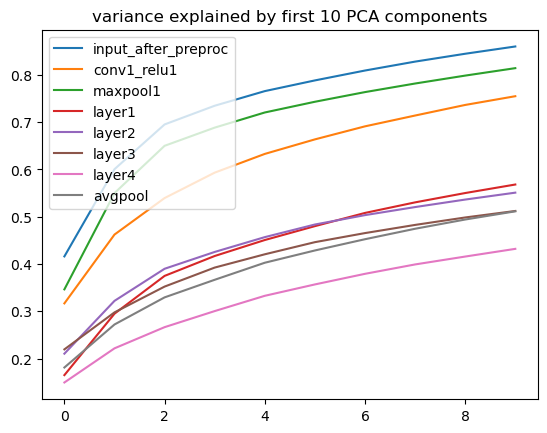

In [8]:
import nat_asd_utils
from sklearn.decomposition import PCA

all_layers=['input_after_preproc',
                    'conv1_relu1',
                    'maxpool1',
                    'layer1',
                    'layer2',
                    'layer3',
                    'layer4',
                    'avgpool']
stim='DM'
X=nat_asd_utils.load_audio_features(stim,all_layers)
var_exp_list=[]
#X=nat_asd_utils.standardscale(X)

for x in X:
    pca = PCA(n_components=10)
    pca.fit(x)
    explained_variance = pca.explained_variance_ratio_
    var_exp_list.append(explained_variance)
for i,ve in enumerate(var_exp_list):
    plt.plot(np.cumsum(ve),label=f'{all_layers[i]}')
    plt.legend()
plt.title('variance explained by first 10 PCA components')

In [88]:
X[1].shape

(749, 6784)

Text(0.5, 1.0, 'variance explained by first 10 PCA components')

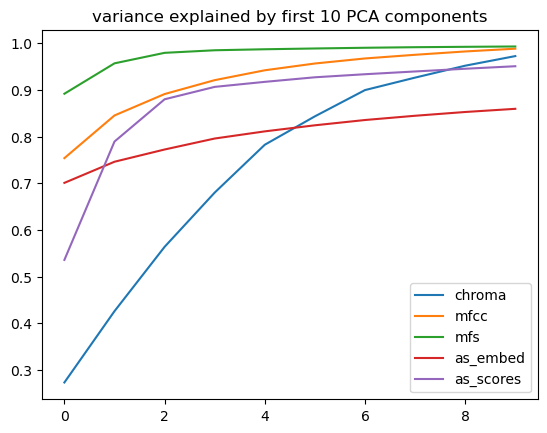

In [13]:
import nat_asd_utils
from sklearn.decomposition import PCA

features=['chroma', 'mfcc', 'mfs', 'as_embed', 'as_scores']
X=[]
for f in features:
    feature=np.load(f'../data/features/DM_{f}.npy')
    #print(feature.shape)
    # transformer = PCA(n_components=n_components)
    #scaler = StandardScaler()
    # feature=transformer.fit_transform(feature)
    #feature = scaler.fit_transform(X=feature,y=None)
    #print(feature.shape)
    #feat_x = resample(feature, 750, axis=0) #resample to 1hz for now 
    X.append(feature)

var_exp_list=[]
for x in X:
    pca = PCA(n_components=10)
    
    pca.fit(x)
    explained_variance = pca.explained_variance_ratio_
    var_exp_list.append(explained_variance)
for i,ve in enumerate(var_exp_list):
    plt.plot(np.cumsum(ve),label=f'{features[i]}')
    plt.legend()
plt.title('variance explained by first 10 PCA components')



In [117]:
#what about applying hrf to the crn50 features?
good_subjects_list

['NDARHJ830RXD',
 'NDARVB897AH1',
 'NDARFA402LMW',
 'NDARUX340FYC',
 'NDARJG687YYX',
 'NDARVD194JX2',
 'NDARVR601FUT',
 'NDARUL694GYN']

In [118]:
import sys
import os
for s in good_subjects_list:
    %run pilot.py -s {s} -p auditory -f cochresnet50pca1hrf -d 0

running subject NDARHJ830RXD
loaded parcels ['A1', 'LBelt', 'MBelt', 'PBelt', 'A4', 'TA2', 'A5']
loaded brain data
No value was passed to args.bootstrap
starting regression
42.95960521697998
saving results
running subject NDARVB897AH1
loaded parcels ['A1', 'LBelt', 'MBelt', 'PBelt', 'A4', 'TA2', 'A5']
loaded brain data
No value was passed to args.bootstrap
starting regression
62.01412558555603
saving results
running subject NDARFA402LMW
loaded parcels ['A1', 'LBelt', 'MBelt', 'PBelt', 'A4', 'TA2', 'A5']
loaded brain data
No value was passed to args.bootstrap
starting regression
61.1872935295105
saving results
running subject NDARUX340FYC
loaded parcels ['A1', 'LBelt', 'MBelt', 'PBelt', 'A4', 'TA2', 'A5']
loaded brain data
No value was passed to args.bootstrap
starting regression
65.51845788955688
saving results
running subject NDARJG687YYX
loaded parcels ['A1', 'LBelt', 'MBelt', 'PBelt', 'A4', 'TA2', 'A5']
loaded brain data
No value was passed to args.bootstrap
starting regression
66.5

In [ ]:
# check demographics of bad subjects

In [3]:
import numpy as np
import pandas as pd

with open('pilots_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
sub_list = [line.strip() for line in sub_list]

In [4]:
nat_img_dir='/nese/mit/group/sig/projects/naturalistic/nat_img/'
dx_final=pd.read_csv(f'{nat_img_dir}sourcedata/data/HBN/phenotype/parsed/dx_onehot.csv')

In [5]:
dx_final = dx_final[dx_final['Identifiers'].isin(sub_list)]
dx_final
# Remove the first 4 rows

#dx_final_dx = dx_final.iloc[3:]
dx_final_dx = dx_final.drop('Site', axis=1)
dxs = []
# Iterate over each row
for index, row in dx_final_dx.iterrows():
    # Get column names where value is 1 for this row
    columns_with_1_this_row = [col for col in dx_final_dx.columns if row[col] == 1]
    # Append this list to the main list
    dxs.append(columns_with_1_this_row)

In [8]:

# You can get a list of lengths using a list comprehension
lengths = [len(lst) for lst in dxs]

print(lengths)  # This will output: [3, 2, 4]


[4, 2, 1, 3, 2, 2, 2, 1, 2, 2, 4, 5, 4, 2, 2, 1, 5, 1, 2, 1, 4, 1, 5, 5, 2, 3]


In [9]:
stackedr2_list=[]
mean_stackedr2_list=[]
fd_mean_list=[]
fd_num_list=[]
fd_perc_list=[]
tsnr_list=[]
for sub in sub_list:
#sub=sub_list[0]
    loaded=np.load(f'../pilot_results/feat-audio_sub-{sub}_ROI-all_PCA-1_delay-6.npz')
    stackedr2_list.append(loaded['stacked_r2s'])
    mean_stackedr2_list.append(loaded['stacked_r2s'].mean())
    # fd_mean_list.append(all_qc_ru_dm.loc[all_qc['sub'] == sub, 'fd_mean'].values[0])
    # fd_num_list.append(all_qc_ru_dm.loc[all_qc['sub'] == sub, 'fd_num'].values[0])
    # fd_perc_list.append(all_qc_ru_dm.loc[all_qc['sub'] == sub, 'fd_perc'].values[0])
    # tsnr_list.append(all_qc_ru_dm.loc[all_qc['sub'] == sub, 'tsnr'].values[0])

In [217]:
# Your original list

# Find the maximum value in the list
max_val = max(lengths)

# Create a new list where each item is divided by the maximum value
lengths_norm = [i/max_val for i in lengths]

print(lengths_norm)

ages=list(dx_final_dx['Age'])
max_val = max(ages)

# Create a new list where each item is divided by the maximum value
ages_norm = [i/max_val for i in ages]
print(ages_norm)

[0.8, 0.4, 0.2, 0.6, 0.4, 0.4, 0.4, 0.2, 0.4, 0.4, 0.8, 1.0, 0.8, 0.4, 0.4, 0.2, 1.0, 0.2, 0.4, 0.2, 0.8, 0.2, 1.0, 1.0, 0.4, 0.6]
[0.5304383749865922, 0.7343319350010005, 0.7005994472808428, 0.8690639063633095, 0.5260203644397059, 0.3859018630089553, 0.817454332879354, 0.45985604317453066, 0.3919669763966897, 0.38436797099126024, 0.6753212736645167, 0.6831252606807782, 0.8626100838931238, 0.6995461590641189, 0.7363960031560228, 0.8980390608942243, 0.5470359987490421, 0.5679314821081355, 0.5950758063265826, 0.36044702597894057, 0.8799216732299407, 0.6880381270753381, 0.9961333577642331, 0.9170401374194737, 1.0, 0.9555794067343896]


In [218]:
len(mean_stackedr2_list)

26

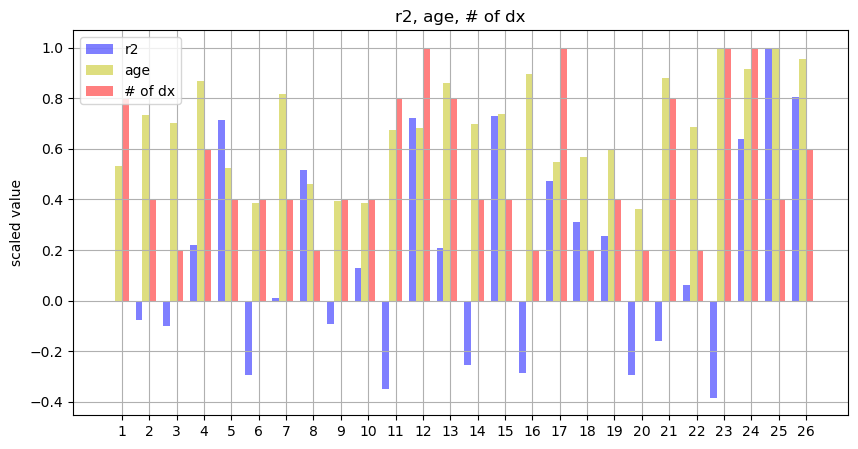

In [221]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have 3 lists of length 20
list1 = mean_stackedr2_list/max(mean_stackedr2_list)
list2 = ages_norm
list3 = lengths_norm

# Setting the positions and width for the bars
pos = list(range(len(list1))) 
width = 0.25 

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with list1 data,
# in position pos,
plt.bar(pos, 
        list1, 
        width, 
        alpha=0.5, 
        color='b',
        label='stacked r2') 

# Create a bar with list2 data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        list2, 
        width, 
        alpha=0.5, 
        color='y', 
        label='Age') 

# Create a bar with list3 data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        list3, 
        width, 
        alpha=0.5, 
        color='r', 
        label='# of dx') 

# Set the y axis label
ax.set_ylabel('scaled value')

# Set the chart's title
ax.set_title('r2, age, # of dx')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(range(1,27))

# Adding the legend and showing the plot
plt.legend(['r2', 'age', '# of dx'], loc='upper left')
plt.grid()
plt.show()

In [13]:
for ii,dxx in enumerate(dxs):
    print(ii+1, list(dx_final_dx['Sex'])[ii], dxx)

1 male ['ADHD-Inattentive Type', 'Enuresis', 'Social Anxiety (Social Phobia)', 'Specific Learning Disorder with Impairment in Reading']
2 male ['ADHD-Combined Type', 'Disruptive Mood Dysregulation Disorder']
3 male ['ADHD-Combined Type']
4 male ['ADHD-Inattentive Type', 'Language Disorder', 'Speech Sound Disorder']
5 female ['Oppositional Defiant Disorder', 'Other Specified Anxiety Disorder']
6 male ['ADHD-Hyperactive/Impulsive Type', 'Oppositional Defiant Disorder']
7 female ['Specific Learning Disorder with Impairment in Mathematics', 'Specific Learning Disorder with Impairment in Reading']
8 male ['Specific Learning Disorder with Impairment in Reading']
9 female ['ADHD-Inattentive Type', 'Persistent (Chronic) Motor or Vocal Tic Disorder']
10 male ['ADHD-Combined Type', 'Oppositional Defiant Disorder']
11 male ['ADHD-Inattentive Type', 'Language Disorder', 'Specific Learning Disorder with Impairment in Reading', 'Speech Sound Disorder']
12 female ['ADHD-Inattentive Type', 'Generalize

In [ ]:
# visualize the components

In [20]:
import pilot
import matplotlib.pyplot as plt
X,features=pilot.load_features('cochresnet50pca20hrfssfirst')

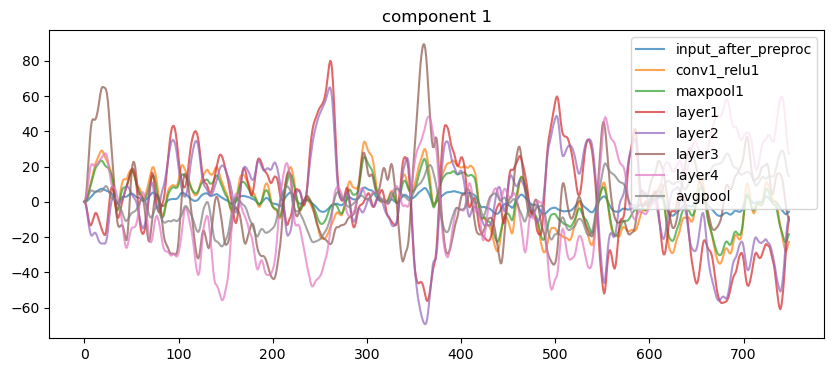

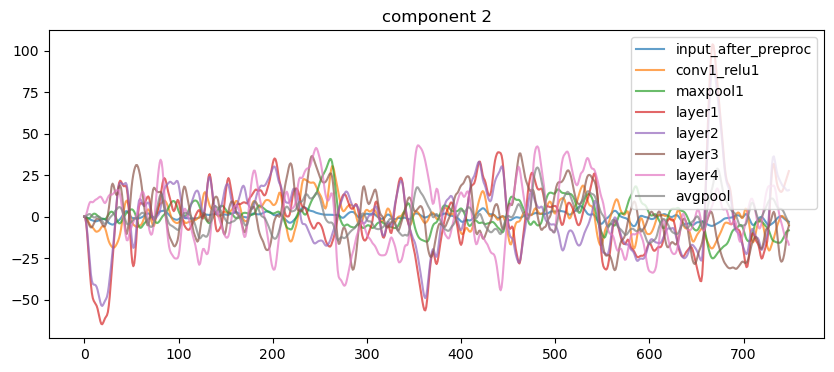

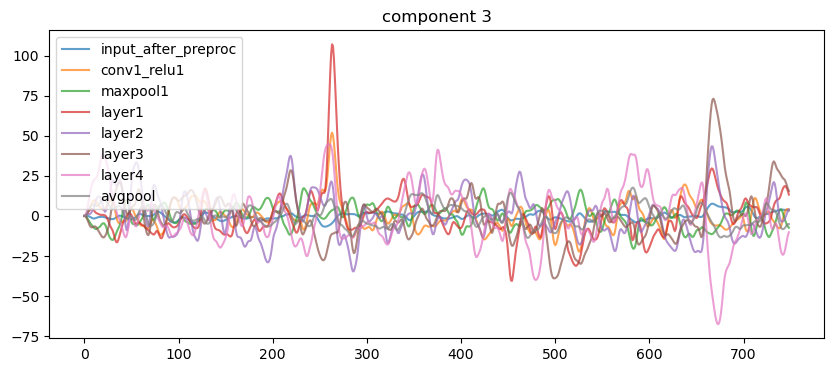

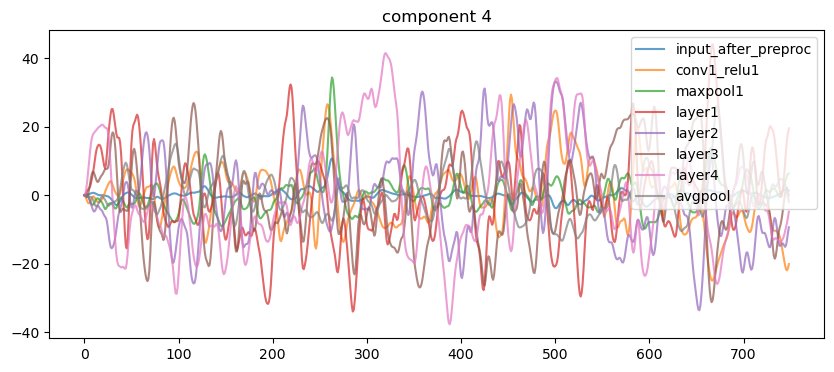

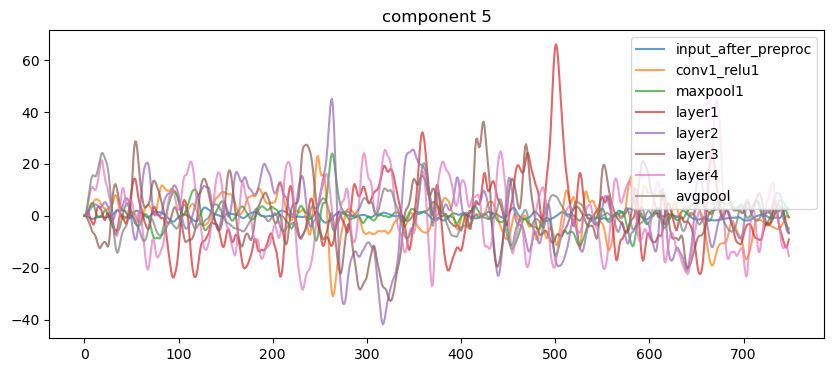

In [39]:

for ii in [1,2,3,4,5]:

    plt.figure(figsize=(10,4))
    
    for i,x in enumerate(X):
        #print(x[:,0].shape)
        plt.plot(x[:,ii],label=features[i],alpha=0.7)
    plt.legend()
    plt.title(f'component {ii}')

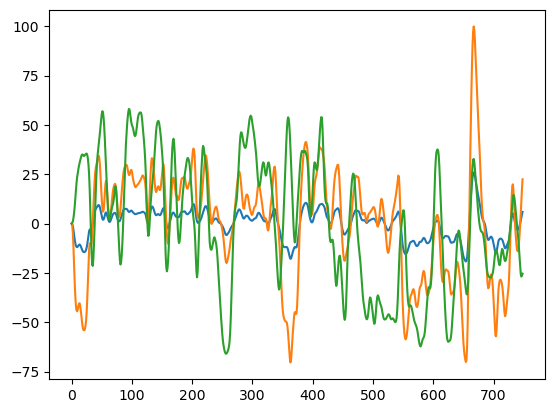

In [37]:
plt.plot(X[0][:,0])
plt.plot(X[1][:,0])
plt.plot(X[3][:,0])


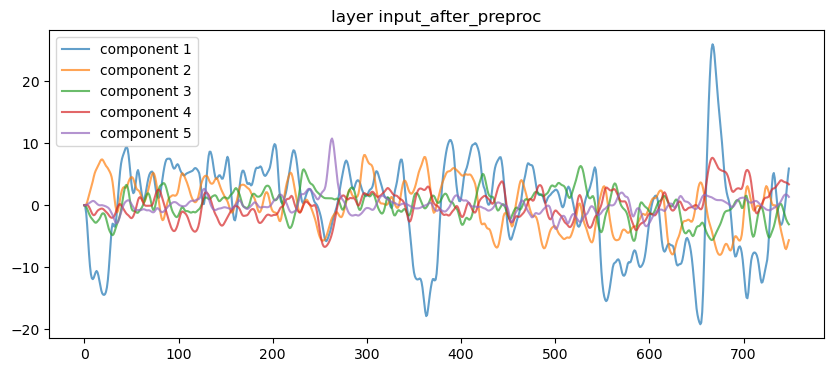

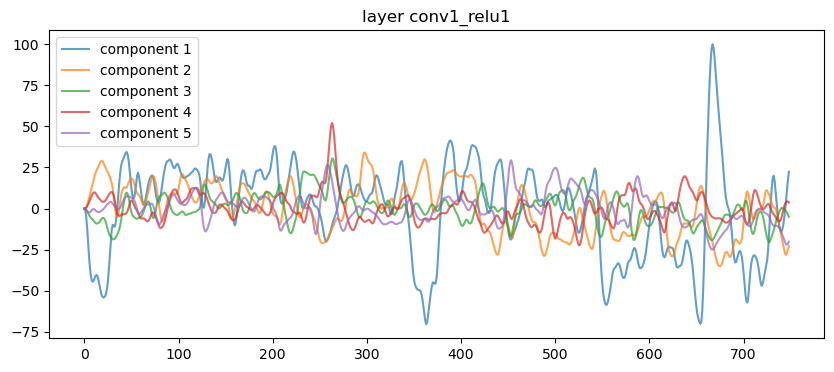

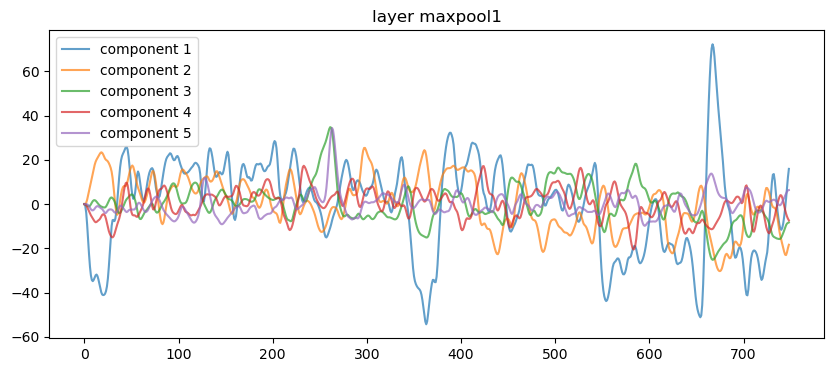

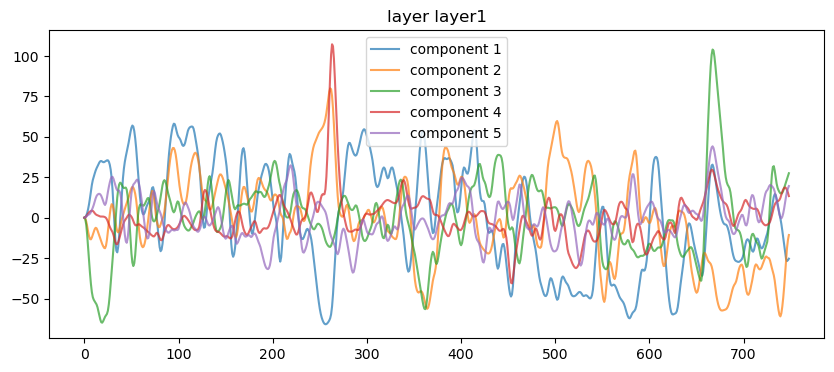

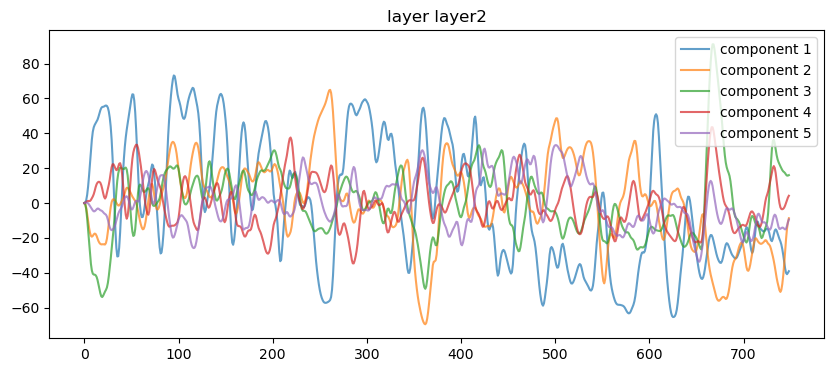

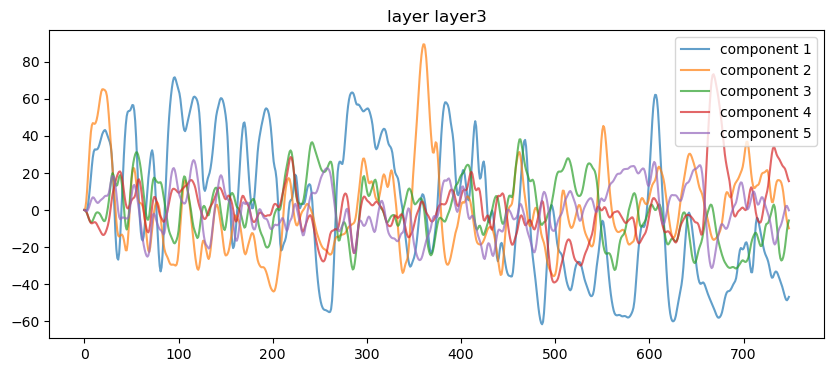

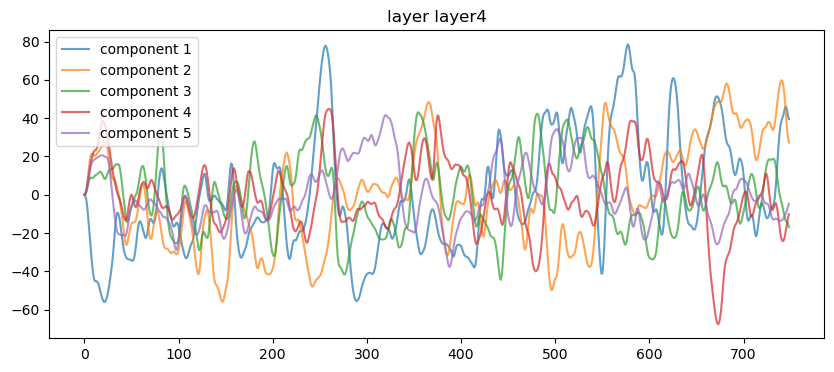

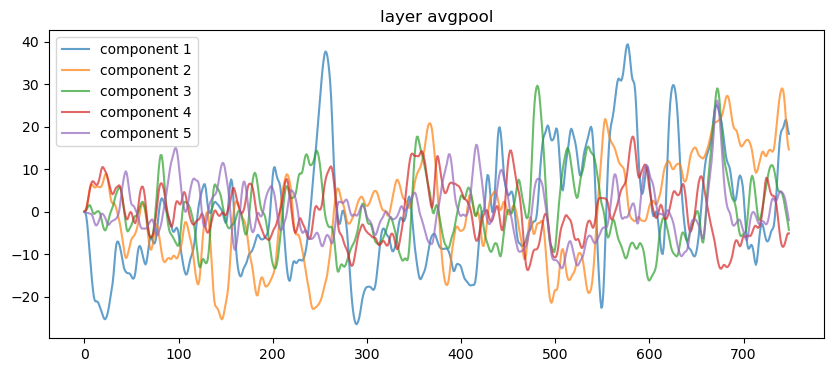

In [41]:

for layer,layername in enumerate(features):

    plt.figure(figsize=(10,4))
    
    for component in [0,1,2,3,4]:
        #print(x[:,0].shape)
        plt.plot(X[layer][:,component],label=f'component {component+1}',alpha=0.7)
    plt.legend()
    plt.title(f'layer {layername}')

In [104]:
#double check PCA is being performed correctly..
# do standard scaler first!

In [6]:
import sys
import os
for s in good_subjects_list:
    %run pilot.py -s {s} -p auditory -f cochresnet50pca1hrfssfirst -d 0

running subject NDARHJ830RXD
loaded parcels ['A1', 'LBelt', 'MBelt', 'PBelt', 'A4', 'TA2', 'A5']
loaded brain data
No value was passed to args.bootstrap
starting regression
48.424567222595215
saving results
running subject NDARVB897AH1
loaded parcels ['A1', 'LBelt', 'MBelt', 'PBelt', 'A4', 'TA2', 'A5']
loaded brain data
No value was passed to args.bootstrap
starting regression
48.615208864212036
saving results
running subject NDARFA402LMW
loaded parcels ['A1', 'LBelt', 'MBelt', 'PBelt', 'A4', 'TA2', 'A5']
loaded brain data
No value was passed to args.bootstrap
starting regression
48.150670528411865
saving results
running subject NDARUX340FYC
loaded parcels ['A1', 'LBelt', 'MBelt', 'PBelt', 'A4', 'TA2', 'A5']
loaded brain data
No value was passed to args.bootstrap
starting regression
48.09539294242859
saving results
running subject NDARJG687YYX
loaded parcels ['A1', 'LBelt', 'MBelt', 'PBelt', 'A4', 'TA2', 'A5']
loaded brain data
No value was passed to args.bootstrap
starting regression


In [7]:
for s in good_subjects_list:
    %run pilot.py -s {s} -p auditory -f cochresnet50pca20hrfssfirst -d 0

running subject NDARHJ830RXD
loaded parcels ['A1', 'LBelt', 'MBelt', 'PBelt', 'A4', 'TA2', 'A5']
loaded brain data
No value was passed to args.bootstrap
starting regression
61.60105586051941
saving results
running subject NDARVB897AH1
loaded parcels ['A1', 'LBelt', 'MBelt', 'PBelt', 'A4', 'TA2', 'A5']
loaded brain data
No value was passed to args.bootstrap
starting regression
62.460530519485474
saving results
running subject NDARFA402LMW
loaded parcels ['A1', 'LBelt', 'MBelt', 'PBelt', 'A4', 'TA2', 'A5']
loaded brain data
No value was passed to args.bootstrap
starting regression
63.20655798912048
saving results
running subject NDARUX340FYC
loaded parcels ['A1', 'LBelt', 'MBelt', 'PBelt', 'A4', 'TA2', 'A5']
loaded brain data
No value was passed to args.bootstrap
starting regression
66.83715105056763
saving results
running subject NDARJG687YYX
loaded parcels ['A1', 'LBelt', 'MBelt', 'PBelt', 'A4', 'TA2', 'A5']
loaded brain data
No value was passed to args.bootstrap
starting regression
70

In [42]:
### what if i train a model on audioset and cochresnet50
### does it do better? or is the information redundant?
### correlate with known features??
### ask Greg
### yibei check stacked regression code next week?
### help desk code review?

In [ ]:
# does zscore() change the features much? their new code added this in the CV loop

In [2]:
# import sys
# import os
for s in good_subjects_list:
    %run pilot.py -s {s} -p auditory -f cochresnet50pca1hrfssfirst -d 0 -z
        
for s in good_subjects_list:
    %run pilot.py -s {s} -p auditory -f cochresnet50pca20hrfssfirst -d 0 -z

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


running subject NDARHJ830RXD
loaded parcels ['A1', 'LBelt', 'MBelt', 'PBelt', 'A4', 'TA2', 'A5']
loaded brain data
No value was passed to args.bootstrap
starting regression
39.99591040611267
saving results
running subject NDARVB897AH1
loaded parcels ['A1', 'LBelt', 'MBelt', 'PBelt', 'A4', 'TA2', 'A5']
loaded brain data
No value was passed to args.bootstrap
starting regression
39.917999029159546
saving results
running subject NDARFA402LMW
loaded parcels ['A1', 'LBelt', 'MBelt', 'PBelt', 'A4', 'TA2', 'A5']
loaded brain data
No value was passed to args.bootstrap
starting regression
39.92031502723694
saving results
running subject NDARUX340FYC
loaded parcels ['A1', 'LBelt', 'MBelt', 'PBelt', 'A4', 'TA2', 'A5']
loaded brain data
No value was passed to args.bootstrap
starting regression
39.14960956573486
saving results
running subject NDARJG687YYX
loaded parcels ['A1', 'LBelt', 'MBelt', 'PBelt', 'A4', 'TA2', 'A5']
loaded brain data
No value was passed to args.bootstrap
starting regression
38

In [6]:
import pilot
import matplotlib.pyplot as plt
X,features=pilot.load_features('cochresnet50pca20hrfssfirst') #load X

In [14]:
from scipy.stats import zscore
X_z=zscore(X)

X_z2=[]
for x in X:
    X_z2.append(zscore(x))

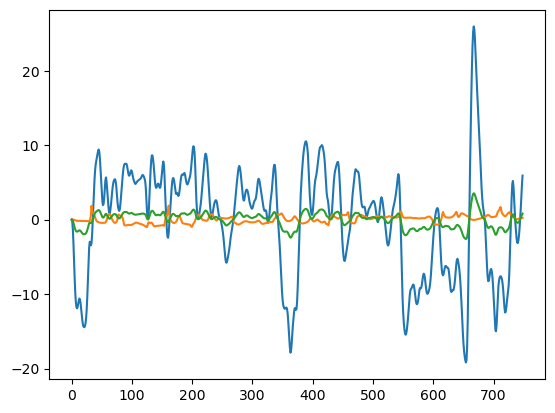

In [15]:
plt.plot(X[0][:,0])
plt.plot(X_z[0][:,0])
plt.plot(X_z2[0][:,0])


In [1]:
import pilot
X,features=pilot.load_features('both_hrf')

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [2]:
for xx in X:
    print(xx.shape)

(749, 1)
(749, 1)
(749, 1)
(749, 1)
(749, 1)
(749, 1)
(749, 1)
(749, 1)
(749, 1024)
(749, 521)


## test out himalaya

In [9]:
import pilot
import nat_asd_utils
import numpy as np
import nibabel as nb

from himalaya.ridge import GroupRidgeCV
from sklearn.model_selection import train_test_split

from stacking_fmri import feat_ridge_CV, stacking_CV_fmri
from stacking_fmri import get_cv_indices



In [84]:
parcels=['A4',
    'A5']
atlas,atlas_data=nat_asd_utils.load_glasser()

atlas_indices,indices,parcel_names=nat_asd_utils.get_parcel_indices(atlas,parcels)

atlas_indices_indices = np.where(np.isin(atlas_data, atlas_indices))[0]

delay=0

X,feature_list=pilot.load_features('cochresnet50pca1hrf')
#X,features=pilot.load_features('cochresnet50pca20hrfssfirst')
#X,features=pilot.load_features('cochresnet50pca1hrfssfirst')
#X,features=pilot.load_features('manualhrf')

sub='NDARHJ830RXD'


im_file = f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/xcp_d_0.7.1/sub-{sub}/ses-HBNsiteRU/func/sub-{sub}_ses-HBNsiteRU_task-movieDM_space-fsLR_den-91k_desc-denoisedSmoothed_bold.dtseries.nii'
img = nb.load(im_file)
img_y = img.get_fdata()
Y=img_y[delay:,atlas_indices_indices]

X = [array[:Y.shape[0], :] for array in X]
Y= Y[:X[0].shape[0],:]

#trim first 20 TRs
X = [array[20:, :] for array in X]
Y= Y[20:,:]



n_time=Y.shape[0]
n_folds=5
ind = get_cv_indices(n_time, n_folds=n_folds)
data=np.copy(Y)
#features=np.copy(X)
features=X
r2_list=[]
coef_list=[]
for ind_num in range(n_folds):
    # split data into training and testing sets
    train_ind = ind != ind_num
    test_ind = ind == ind_num
    train_data = data[train_ind]
    train_features = [F[train_ind] for F in features]
    test_data = data[test_ind]
    test_features = [F[test_ind] for F in features]



#    X_train, X_test, Y_train, Y_test = train_test_split(X[i], Y, test_size=0.1, shuffle=False)
    
    
    banded_ridge= GroupRidgeCV(groups="input",cv=5)
    banded_ridge.fit(train_features, train_data)
    score = banded_ridge.score(test_features, test_data)
    print("R^2 Score: ", np.mean(score))
    r2_list.append(score)
    coef_list.append(banded_ridge.coef_)
    # train_preds, train_err, test_preds, train_scores, train_variances= feat_ridge_CV(
    #     train_features,
    #     train_data,
    #     test_features,
    #     method="cross_val_ridge",
    #     n_folds=5,
    #     score_function=R2)
    # print( np.mean(train_scores) )
# np.mean(coef_list,axis=0)
# np.mean(r2_list,axis=0)

print(np.mean(r2_list))
r2s,stacked_r2s,r2s_weighted,r2s_train,stacked_train,S_average=stacking_CV_fmri(Y, X, method="cross_val_ridge", n_folds=5, score_f=R2)
print(np.mean(r2s))

[........................................] 100% | 0.86 sec | 100 random sampling with cv | 
R^2 Score:  -0.005859391
[........................................] 100% | 0.84 sec | 100 random sampling with cv | 
R^2 Score:  0.10386702
[........................................] 100% | 0.84 sec | 100 random sampling with cv | 
R^2 Score:  0.06149703
[........................................] 100% | 0.84 sec | 100 random sampling with cv | 
R^2 Score:  -0.09063718
[........................................] 100% | 0.85 sec | 100 random sampling with cv | 
R^2 Score:  -0.050627477
0.0036479991
0.07494680059215272


In [94]:
%run pilot.py -s NDARHJ830RXD -p auditory -f cochresnet50pca1hrf -d 0 -g

running subject NDARHJ830RXD
loaded parcels ['A1', 'LBelt', 'MBelt', 'PBelt', 'A4', 'TA2', 'A5']
loaded brain data
No value was passed to args.bootstrap
[........................................] 100% | 1.50 sec | 100 random sampling with cv | 
R^2 Score:  0.0041724914
[........................................] 100% | 1.37 sec | 100 random sampling with cv | 
R^2 Score:  0.042783525
[........................................] 100% | 1.39 sec | 100 random sampling with cv | 
R^2 Score:  0.05778747
[........................................] 100% | 1.39 sec | 100 random sampling with cv | 
R^2 Score:  -0.0748602
[........................................] 100% | 1.41 sec | 100 random sampling with cv | 
R^2 Score:  -0.04900921
8.00840425491333
saving results


In [95]:
## correlate with known features

In [ ]:
# load a bunch of features

In [178]:
feature_names=[]
feature_data=[]

X,feats=pilot.load_features('cochresnet50pca20hrfssfirst')

for i,f in enumerate(feats):
#    for ii in range(X[i].shape[1]):
    for ii in [0,1]:

        current_feature_name=f'{f}_PCA{ii+1}'
        feature_names.append(current_feature_name)
        feature_data.append(X[i][:,ii])
    


X1,feats=pilot.load_features('manualhrfpca10')
X = [x[:-1,:] for x in X1]
for i,f in enumerate(feats):
    for ii in [0,1]:
        current_feature_name=f'{f}_PCA{ii+1}'
        feature_names.append(current_feature_name)
        feature_data.append(X[i][:,ii])

X1,feats=pilot.load_features('audioset')
X = [x[:-1,:] for x in X1]
for xx in X:
    hz=xx.shape[0]/600
    hrf_tools.apply_optimal_hrf_10hz(xx,hz)

feature_names.append('as-Speech')
feature_data.append(X[1][:,0])

feature_names.append('as-Music')
feature_data.append(X[1][:,132])
# X1 = [x[:-1,:] for x in X]
# X1[0].shape
# for x in X1:
#     X.append(X1)

In [179]:
feature_names

['input_after_preproc_PCA1',
 'input_after_preproc_PCA2',
 'conv1_relu1_PCA1',
 'conv1_relu1_PCA2',
 'maxpool1_PCA1',
 'maxpool1_PCA2',
 'layer1_PCA1',
 'layer1_PCA2',
 'layer2_PCA1',
 'layer2_PCA2',
 'layer3_PCA1',
 'layer3_PCA2',
 'layer4_PCA1',
 'layer4_PCA2',
 'avgpool_PCA1',
 'avgpool_PCA2',
 'chroma_PCA1',
 'chroma_PCA2',
 'mfcc_PCA1',
 'mfcc_PCA2',
 'mfs_PCA1',
 'mfs_PCA2',
 'as_embed_PCA1',
 'as_embed_PCA2',
 'as_scores_PCA1',
 'as_scores_PCA2',
 'as-Speech',
 'as-Music']

In [180]:
corr_matrix=np.corrcoef(np.asanyarray(feature_data))

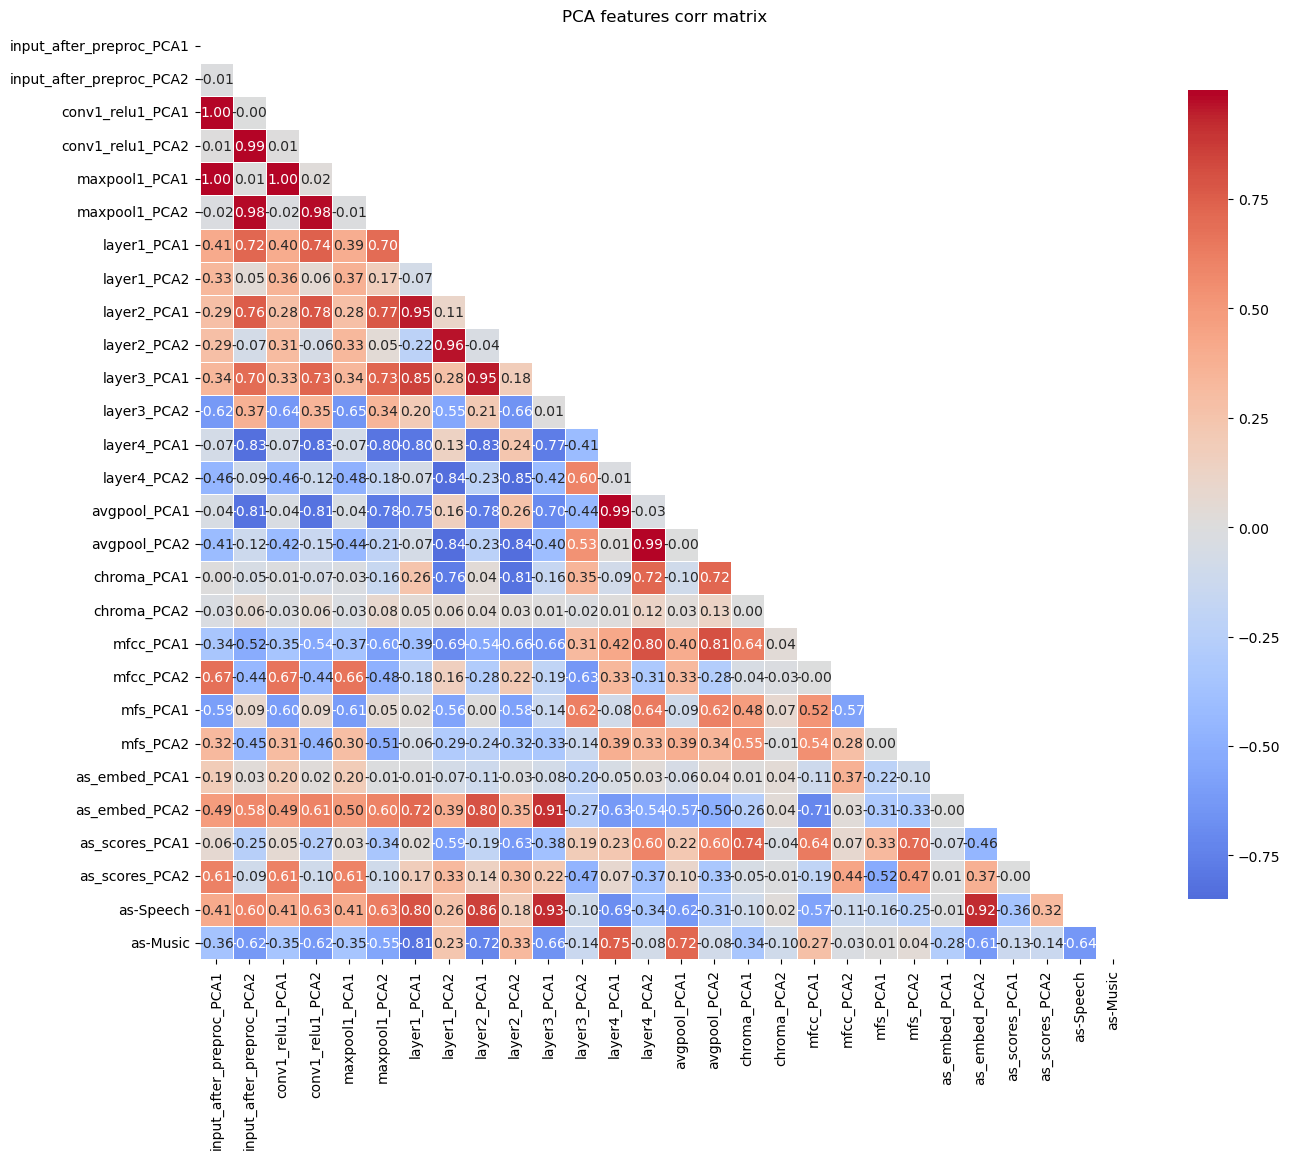

In [181]:

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Choose a custom colormap (e.g., 'coolwarm')
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Plot the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, center=0,
            square=True, fmt='.2f',linewidths=.5, cbar_kws={"shrink": 0.7},xticklabels=feature_names, yticklabels=feature_names)


# plt.xticks( np.arange(len(feature_names))+.5, feature_names, rotation=45)
# plt.yticks( np.arange(len(feature_names))+.5, feature_names, rotation=0)
plt.title("PCA features corr matrix")

plt.show()

In [162]:
#add speech and music to this chart

In [163]:
class_names = np.load('/om2/user/jsmentch/data/yamnet_output/yamnet_class_names.npy')

In [171]:
list(class_names).index('Speech')

0

In [172]:
list(class_names).index('Music')

132

## see how the features do when not stacked

In [1]:
import pilot
import nat_asd_utils
import numpy as np
import nibabel as nb

from himalaya.ridge import GroupRidgeCV
from sklearn.model_selection import train_test_split

# from stacking_fmri import feat_ridge_CV, stacking_CV_fmri
from stacking_fmri import get_cv_indices
from sklearn.linear_model import RidgeCV


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [31]:
X,features=pilot.load_features('manualhrfpca10')
features

['chroma', 'mfcc', 'mfs', 'as_embed', 'as_scores']

In [11]:
parcels=['A4',
    'A5']
atlas,atlas_data=nat_asd_utils.load_glasser()

atlas_indices,indices,parcel_names=nat_asd_utils.get_parcel_indices(atlas,parcels)

atlas_indices_indices = np.where(np.isin(atlas_data, atlas_indices))[0]

delay=0

#X,feature_list=pilot.load_features('manualhrfpca10')
X,features=pilot.load_features('cochresnet50pca20hrfssfirst')
#X,features=pilot.load_features('cochresnet50pca1hrfssfirst')
#X,features=pilot.load_features('manualhrf')

sub='NDARHJ830RXD'


im_file = f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/xcp_d_0.7.1/sub-{sub}/ses-HBNsiteRU/func/sub-{sub}_ses-HBNsiteRU_task-movieDM_space-fsLR_den-91k_desc-denoisedSmoothed_bold.dtseries.nii'
img = nb.load(im_file)
img_y = img.get_fdata()
Y=img_y[delay:,atlas_indices_indices]

X = [array[:Y.shape[0], :] for array in X]
Y= Y[:X[0].shape[0],:]

#trim first 20 TRs
X = [array[20:, :] for array in X]
Y= Y[20:,:]

X=X[3]

n_time=Y.shape[0]
n_folds=5
ind = get_cv_indices(n_time, n_folds=n_folds)
data=np.copy(Y)
#features=np.copy(X)
for pcaind in [1,2,3,4,5]:
    print('number of pca components',pcaind)
    features=X[:,pcaind-1:pcaind]
    test_r2_list=[]
    train_r2_list=[]
    coef_list=[]
    for ind_num in range(n_folds):
        # split data into training and testing sets
        train_ind = ind != ind_num
        test_ind = ind == ind_num
        train_data = data[train_ind]
        train_features = features[train_ind]#[F[train_ind] for F in features]
        test_data = data[test_ind]
        test_features = features[test_ind]#[F[test_ind] for F in features]
    
    
    
    #    X_train, X_test, Y_train, Y_test = train_test_split(X[i], Y, test_size=0.1, shuffle=False)
        
        
        #banded_ridge= GroupRidgeCV(groups="input",cv=5)
        ridge=RidgeCV()
        ridge.fit(train_features, train_data)
        test_score = ridge.score(test_features, test_data)
        train_score= ridge.score(train_features, train_data)
        print(f"fold {ind_num} test R^2 Score: ", format(np.mean(test_score), '.2f'))
        print(f"fold {ind_num} train R^2 Score: ", format(np.mean(train_score), '.2f'))
    
        test_r2_list.append(test_score)
        train_r2_list.append(train_score)
    
        # coef_list.append(banded_ridge.coef_)
        # train_preds, train_err, test_preds, train_scores, train_variances= feat_ridge_CV(
        #     train_features,
        #     train_data,
        #     test_features,
        #     method="cross_val_ridge",
        #     n_folds=5,
        #     score_function=R2)
        # print( np.mean(train_scores) )
    # np.mean(coef_list,axis=0)
    # np.mean(r2_list,axis=0)

    
    print("MEAN test R^2 Score: ", format(np.mean(test_r2_list), '.2f'))
    print("MEAN train R^2 Score: ", format(np.mean(train_r2_list), '.2f'))
    # print(np.mean(r2_list))
    # r2s,stacked_r2s,r2s_weighted,r2s_train,stacked_train,S_average=stacking_CV_fmri(Y, X, method="cross_val_ridge", n_folds=5, score_f=R2)
    # print(np.mean(r2s))

number of pca components 1
fold 0 test R^2 Score:  -0.03
fold 0 train R^2 Score:  0.09
fold 1 test R^2 Score:  0.15
fold 1 train R^2 Score:  0.05
fold 2 test R^2 Score:  0.07
fold 2 train R^2 Score:  0.07
fold 3 test R^2 Score:  -0.23
fold 3 train R^2 Score:  0.11
fold 4 test R^2 Score:  0.05
fold 4 train R^2 Score:  0.08
MEAN test R^2 Score:  0.00
MEAN train R^2 Score:  0.08
number of pca components 2
fold 0 test R^2 Score:  -0.00
fold 0 train R^2 Score:  0.01
fold 1 test R^2 Score:  -0.12
fold 1 train R^2 Score:  0.03
fold 2 test R^2 Score:  -0.01
fold 2 train R^2 Score:  0.01
fold 3 test R^2 Score:  0.01
fold 3 train R^2 Score:  0.01
fold 4 test R^2 Score:  -0.08
fold 4 train R^2 Score:  0.02
MEAN test R^2 Score:  -0.04
MEAN train R^2 Score:  0.01
number of pca components 3
fold 0 test R^2 Score:  -0.00
fold 0 train R^2 Score:  0.01
fold 1 test R^2 Score:  -0.03
fold 1 train R^2 Score:  0.02
fold 2 test R^2 Score:  -0.03
fold 2 train R^2 Score:  0.02
fold 3 test R^2 Score:  -0.01
fo

In [ ]:
# make function to get features, manual as 2 crn50 1, as-speech, as-music

In [12]:
X,feats=pilot.load_features('cochresnet50pca1hrfssfirst')


In [15]:
X1,feats=pilot.load_features('manualhrfpca10')


In [22]:
X1[3][:-1,1]

(749,)

In [28]:
import hrf_tools
feature_data=[]
X,feats=pilot.load_features('cochresnet50pca1hrfssfirst')
X = [x[:,0] for x in X]

X1,feats=pilot.load_features('manualhrfpca10')
X.append(X1[3][:-1,1])

X1,feats=pilot.load_features('audioset')
Xx = [x[:-1,:] for x in X1]
for xx in Xx:
    hz=xx.shape[0]/600
    hrf_tools.apply_optimal_hrf_10hz(xx,hz)

X.append(Xx[1][:,0])
X.append(Xx[1][:,132])

In [30]:
np.asanyarray(X).shape

(11, 749)

## see if certain folds typically do better than others

In [2]:
parcels=['A4',
    'A5']
atlas,atlas_data=nat_asd_utils.load_glasser()

atlas_indices,indices,parcel_names=nat_asd_utils.get_parcel_indices(atlas,parcels)

atlas_indices_indices = np.where(np.isin(atlas_data, atlas_indices))[0]

delay=0

#X,feature_list=pilot.load_features('manualhrfpca10')
X,feats=pilot.load_features('concatspeech')
#X,features=pilot.load_features('cochresnet50pca1hrfssfirst')
#X,features=pilot.load_features('manualhrf')

sub='NDARHJ830RXD'


im_file = f'/nese/mit/group/sig/projects/hbn/hbn_bids/derivatives/xcp_d_0.7.1/sub-{sub}/ses-HBNsiteRU/func/sub-{sub}_ses-HBNsiteRU_task-movieDM_space-fsLR_den-91k_desc-denoisedSmoothed_bold.dtseries.nii'
img = nb.load(im_file)
img_y = img.get_fdata()
Y=img_y[delay:,atlas_indices_indices]

X = X[:,:Y.shape[0]]
Y= Y[:X.shape[1],:]

#trim first 20 TRs
X = X.T[20:,:]
Y= Y[20:,:]

n_time=Y.shape[0]
n_folds=5
ind = get_cv_indices(n_time, n_folds=n_folds)
data=np.copy(Y)
features=np.copy(X)

test_r2_list=[]
train_r2_list=[]
coef_list=[]
for ind_num in range(n_folds):
    # split data into training and testing sets
    train_ind = ind != ind_num
    test_ind = ind == ind_num
    train_data = data[train_ind]
    train_features = features[train_ind]#[F[train_ind] for F in features]
    test_data = data[test_ind]
    test_features = features[test_ind]#[F[test_ind] for F in features]



#    X_train, X_test, Y_train, Y_test = train_test_split(X[i], Y, test_size=0.1, shuffle=False)
    
    
    #banded_ridge= GroupRidgeCV(groups="input",cv=5)
    ridge=RidgeCV()
    ridge.fit(train_features, train_data)
    test_score = ridge.score(test_features, test_data)
    train_score= ridge.score(train_features, train_data)
    print(f"fold {ind_num} test R^2 Score: ", format(np.mean(test_score), '.2f'))
    print(f"fold {ind_num} train R^2 Score: ", format(np.mean(train_score), '.2f'))

    test_r2_list.append(test_score)
    train_r2_list.append(train_score)

    # coef_list.append(banded_ridge.coef_)
    # train_preds, train_err, test_preds, train_scores, train_variances= feat_ridge_CV(
    #     train_features,
    #     train_data,
    #     test_features,
    #     method="cross_val_ridge",
    #     n_folds=5,
    #     score_function=R2)
    # print( np.mean(train_scores) )
# np.mean(coef_list,axis=0)
# np.mean(r2_list,axis=0)


print("MEAN test R^2 Score: ", format(np.mean(test_r2_list), '.2f'))
print("MEAN train R^2 Score: ", format(np.mean(train_r2_list), '.2f'))
# print(np.mean(r2_list))
# r2s,stacked_r2s,r2s_weighted,r2s_train,stacked_train,S_average=stacking_CV_fmri(Y, X, method="cross_val_ridge", n_folds=5, score_f=R2)
# print(np.mean(r2s))

fold 0 test R^2 Score:  -0.00
fold 0 train R^2 Score:  0.17
fold 1 test R^2 Score:  0.10
fold 1 train R^2 Score:  0.15
fold 2 test R^2 Score:  0.06
fold 2 train R^2 Score:  0.16
fold 3 test R^2 Score:  -0.05
fold 3 train R^2 Score:  0.17
fold 4 test R^2 Score:  -0.01
fold 4 train R^2 Score:  0.17
MEAN test R^2 Score:  0.02
MEAN train R^2 Score:  0.17


In [12]:

for s in good_subjects_list:
    %run pilot.py -s {s} -p a4a5 -f concatspeech -d 0 -r

running subject NDARHJ830RXD
loaded parcels ['A4', 'A5']
loaded brain data
run ridgecv
No value was passed to args.bootstrap
fold 0 test R^2 Score:  -0.00
fold 0 train R^2 Score:  0.17
fold 1 test R^2 Score:  0.10
fold 1 train R^2 Score:  0.15
fold 2 test R^2 Score:  0.06
fold 2 train R^2 Score:  0.16
fold 3 test R^2 Score:  -0.05
fold 3 train R^2 Score:  0.17
fold 4 test R^2 Score:  -0.01
fold 4 train R^2 Score:  0.17
4.8954150676727295
saving results
MEAN test R^2 Score:  0.02
MEAN train R^2 Score:  0.17
running subject NDARVB897AH1
loaded parcels ['A4', 'A5']
loaded brain data
run ridgecv
No value was passed to args.bootstrap
fold 0 test R^2 Score:  0.08
fold 0 train R^2 Score:  0.21
fold 1 test R^2 Score:  0.04
fold 1 train R^2 Score:  0.23
fold 2 test R^2 Score:  0.02
fold 2 train R^2 Score:  0.22
fold 3 test R^2 Score:  -0.05
fold 3 train R^2 Score:  0.22
fold 4 test R^2 Score:  0.13
fold 4 train R^2 Score:  0.20
22.182674169540405
saving results
MEAN test R^2 Score:  0.04
MEAN t

In [7]:
testing=np.load('../good_pilots/sub-NDARHJ830RXD_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')

In [9]:
testing['test_r2_list']

array([-0.00329205,  0.10224493,  0.06467242, -0.0523898 , -0.00891868])

In [13]:
# plot those results:

In [26]:
test_r2_lists=[]

for s in good_subjects_list:
    loaded=np.load(f'../good_pilots/sub-{s}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
    test_r2_lists.append(loaded['test_r2_list'])

In [27]:
test_r2_lists=np.asanyarray(test_r2_lists)

Text(0.5, 1.0, 'stacked R2 for each cv fold, auditory regions, 8 best subjects')

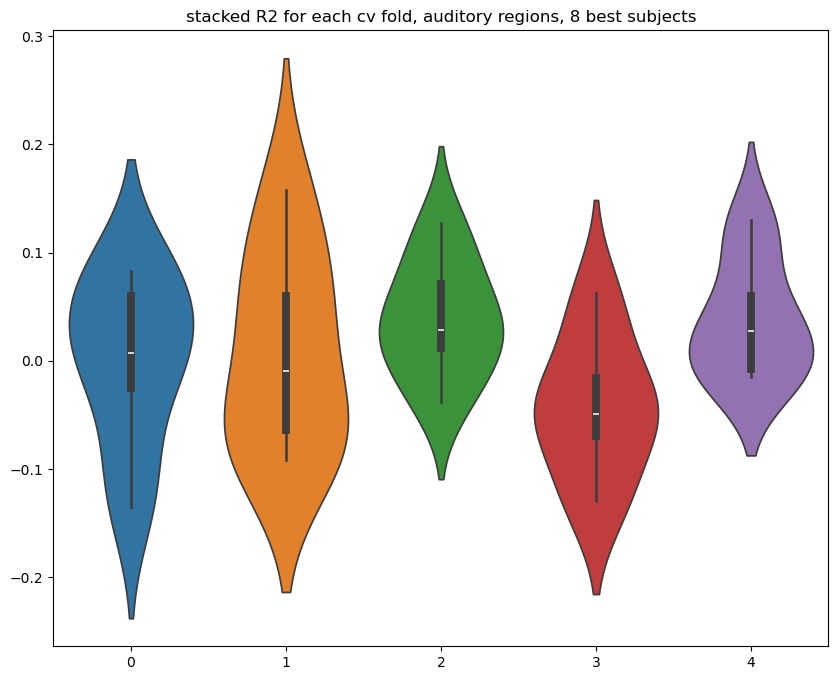

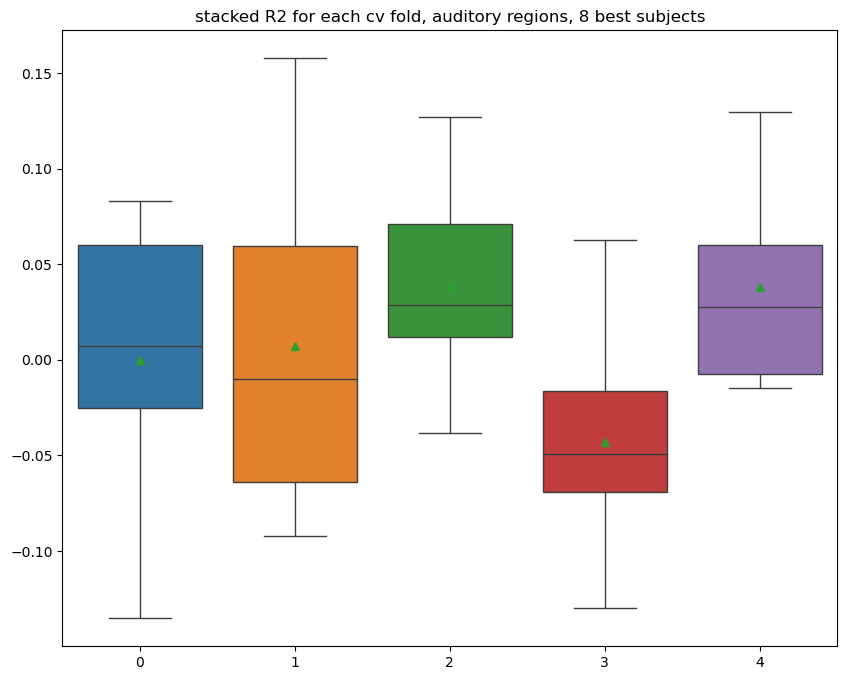

In [30]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(10,8))
ax=sns.violinplot(data=test_r2_lists)
plt.title(f'stacked R2 for each cv fold, auditory regions, 8 best subjects')

# # Add 'stacked' to the end of your features list
# labels = plot_data_labels

# # Set the xticklabels of your plot
# ax.set_xticks(range(len(labels)))
# ax.set_xticklabels(labels,rotation=90)
# plt.show()


# plt.figure(figsize=(20,8))
# ax=sns.boxplot(data=plot_data,showmeans=True)
# plt.title(f'stacked R2 for each feature set, auditory regions, 8 best subjects')

# # Add 'stacked' to the end of your features list
# labels = plot_data_labels

# # Set the xticklabels of your plot
# ax.set_xticks(range(len(labels)))
# ax.set_xticklabels(labels,rotation=90)
# plt.show()

plt.figure(figsize=(10,8))
ax=sns.boxplot(data=test_r2_lists,showmeans=True)
plt.title(f'stacked R2 for each cv fold, auditory regions, 8 best subjects')


In [ ]:
# are low level features good anywhere? should i get new low level features?